

# ***Uses of data analytics in determining the winner in ranked LOL match***



---



---




## 1.   ***Understanding League of Legends***


---






 













  
Developed by Riot Studios, League of Legends, or "LoL", is an online multiplayer video-game that is available to Windows/MacOS users. LoL consists 2 teams ('Blue & 'Red') facing each other, where the main objective is to destroy the opposing teams 'Nexus', or home base, while facing obstacles like destroying damage dealing towers & eliminating players throughout the way. Perks & gold are able to be obtained by players/teams through completing tasks such as eliminating players, enemy creeps, or dragons. Players then spend the gold to purchase items that help raise the power of their abilities.

League of Legends offers different game modes, such as ranked. In this game mode, players are given a rank based off of the number of wins + the number of games played. "Diamond" is one of the highest ranks a player may obtain and is known to be extremely competitive. A ranked game on average lasts 30-45 minutes. The dataset we will be using contains the first 10 minute analytics of each team for different diamond ranked matches.

Once the data is analyzed, teams/players would be able to conceptualize the level of priority different attributes have during early stages of diamond ranked matches. They could then use this information to adjust their strategy to one proven to win matches.Also with the growth of online betting sites in e-sports
here we will check whether it is possible to use data analytics to predict the winning team.




Dataset : https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min



**Question Of Interest : Is it possible to determine the winning team?**

# 2. ***Installation and loading of datasets***



---









In [79]:
!pip install lazypredict


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("bmh")
%matplotlib inline
import seaborn as sns
f = pd.read_csv("high_diamond_ranked_10min.csv")

# 3. ***Data Description***

---








In [7]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

Printing out the information about the dataframe we are able to see that there are a total of 9,879 instances, and 39 attributes.
Additionally we are able to see that there are 19 of the same attributes for each the blue & red team (columns 1-19 are the same as 20-38).

Attributes for each team includes :

*  Wards placed & destroyed
*  Total number of kills, deaths, & assists
*  First Bloods (1st elimination of the game)
*  Total towers destroyed, gold, experience
*  Average  level, CS per minute, & gold per minute
*  Difference in gold & experience between the teams
*  Objective eliminations  elite monsters(dragons, heralds), minions, & jungle minions

Attributes such as total gold, experience, objectives eliminations, towers destroyed, etc. will be of type integer (int64) because they will always be whole numbers. Attributes involving averages such as cs per minute, gold per minute, & level, should be the only of double-precision floating-point format (float64).

The data type for "blueWins" and "first bloods" could be changed to be of type boolean, but because we are wanting to visualize these attributes, optimally it is best to keep these as integer data types. As a result, the data types presented for each attribute are correct and should not be changed.

Below is a sample of data:



In [8]:
f.sample(7)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
968,4515306616,0,19,2,0,5,9,4,0,0,...,0,16972,7.00,17416,216,40,1630,130,21.60,1697.20
1766,4499715260,0,5,0,0,2,15,2,0,0,...,1,22614,7.40,20502,247,80,9152,8290,24.70,2261.40
950,4461136941,1,14,6,1,4,5,5,0,0,...,0,16451,7.20,18946,244,52,1286,1695,24.40,1645.10
3293,4523336586,1,17,2,1,13,5,9,2,1,...,0,15112,6.40,15739,189,46,-3058,-3283,18.90,1511.20
8375,4523101614,1,14,1,1,5,3,2,0,0,...,0,15103,6.80,17522,209,78,-697,-700,20.90,1510.30
1575,4523251665,0,48,3,0,3,6,6,0,0,...,0,16487,7.20,18700,220,49,1501,1478,22.00,1648.70
6831,4440545159,1,15,6,1,10,6,6,0,0,...,0,15960,7.00,17914,207,48,-1372,-1668,20.70,1596.00


# 3. ***Data visualization***



---



Does being on a specific team have an impact on winning?

For context :

*  Red team defends the top right Nexus
*  Blue team defends the bottom left Nexus


Text(0, 0.5, 'Frequency')

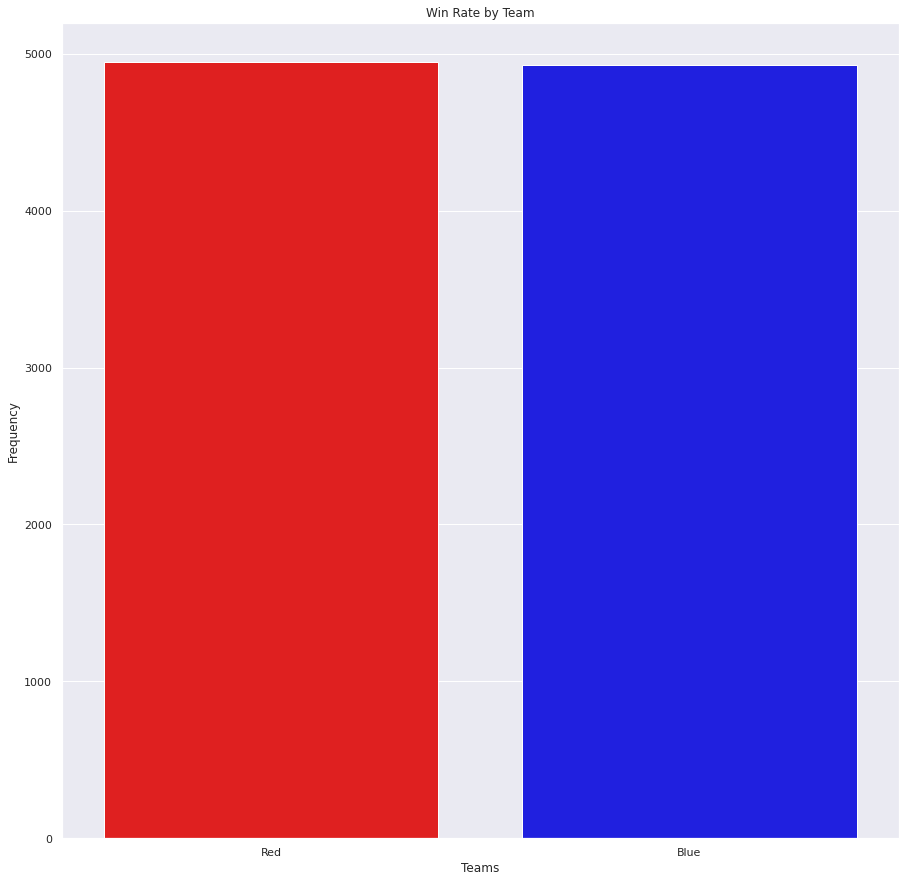

In [80]:
ax = sns.countplot(x="blueWins", data=f, palette=['red', 'blue'])
ax.set_title('Win Rate by Team')
ax.set_xlabel('Teams')
ax.set_xticks([0,1])
ax.set_xticklabels(['Red', 'Blue'])
ax.set_ylabel('Frequency')

Because each team puts you on a specific side of the map, some may think that having a specific perspective on the map may make an impact on your chances of winning. As shown above, the win rate for each team is symmetrical within the large dataset, meaning that defending a specific side of the map will likely not have an impact on the game outcome.





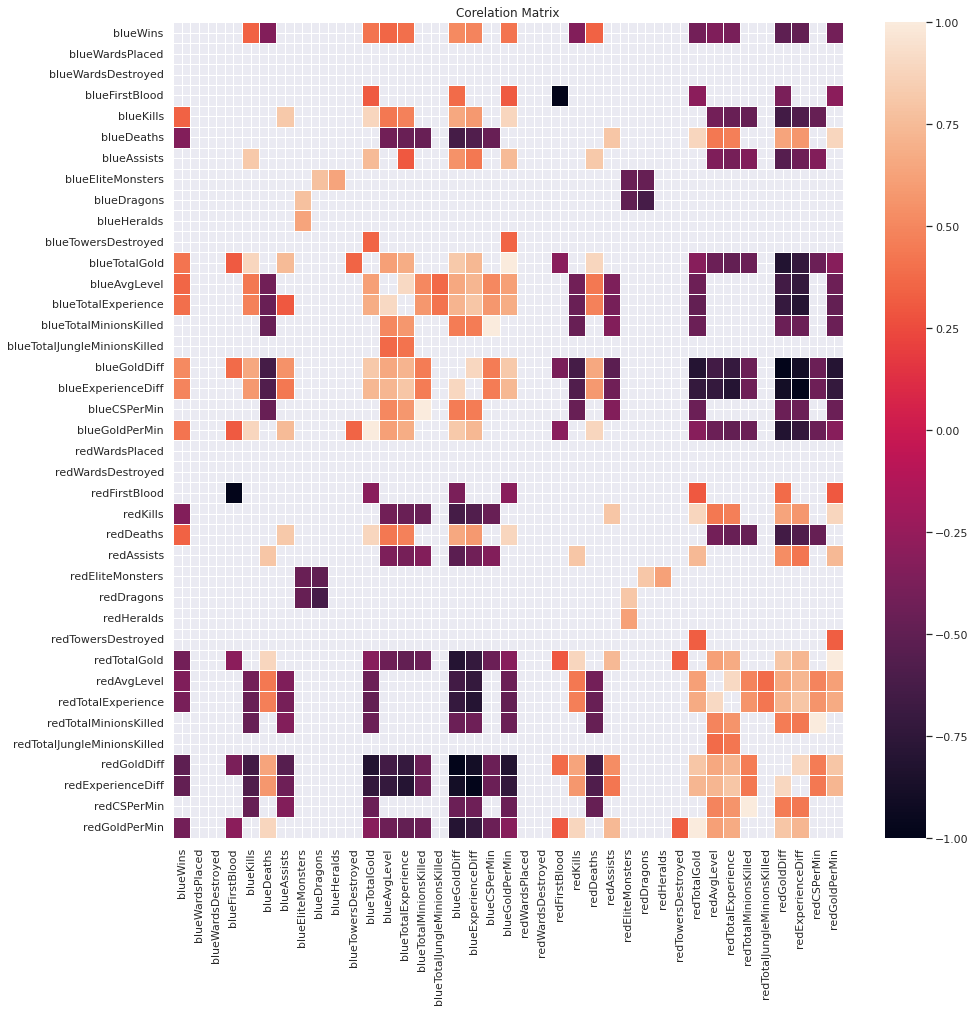

In [83]:
sns.set(rc={'figure.figsize':(15,15)})
corr = f.corr()
sns.heatmap(corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)], annot=False, linewidths=.5, fmt= '.2f')
plt.title('Corelation Matrix');

The heatmap printed above contains correlating values pertaining to the 'blueWins' attribute. We observe that there are 6 attributes with a correlation value of 1 (light orange
)  :

* redDeaths
* blueKills
* blueCSPerMin
* blueTotalGold
* blueGoldPerMin
* blueTotalMinionsKilled

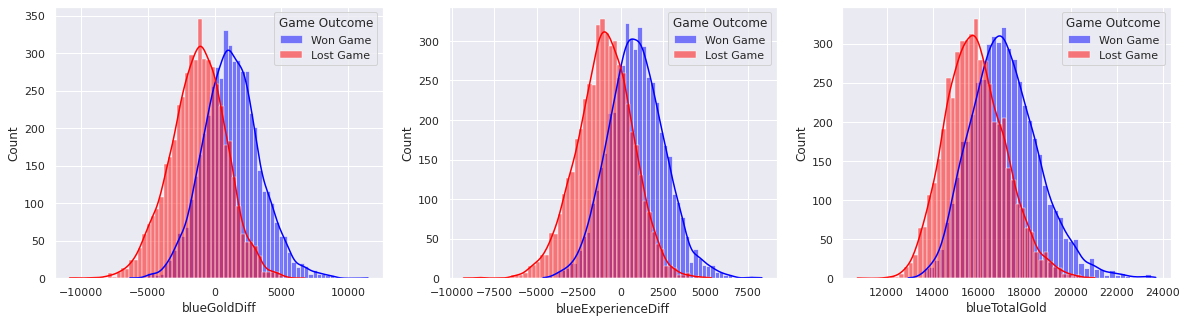

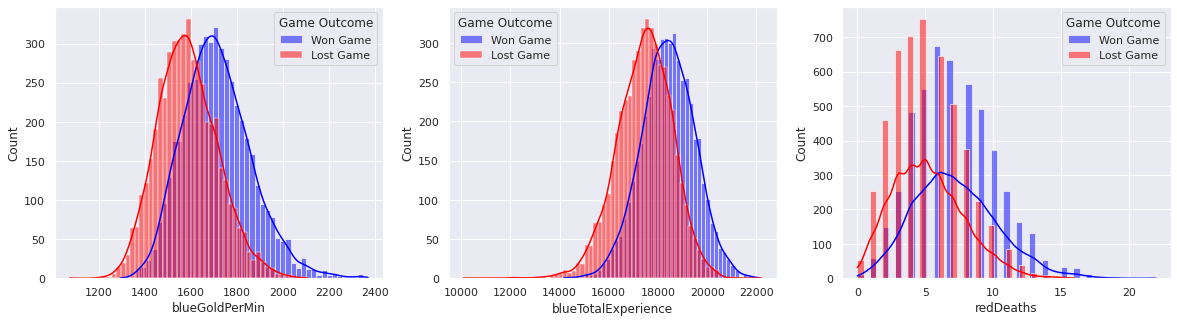

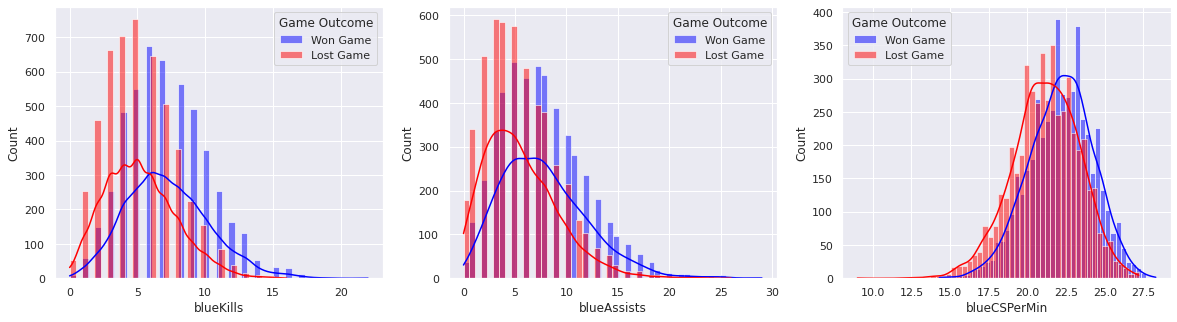

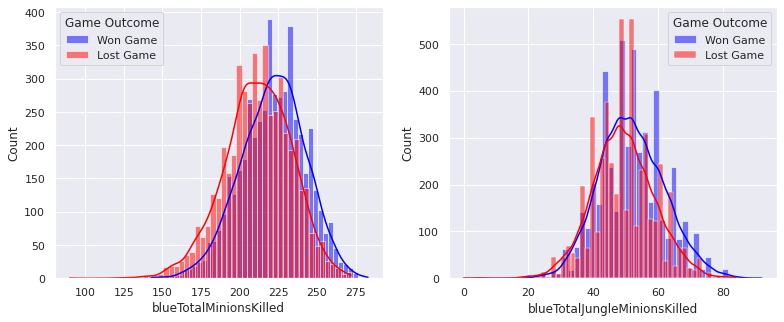

In [88]:


red_col = f.corr()[f.corr()['blueWins'] <= -0.07].index.values
blue_col = f.corr()[f.corr()['blueWins'] >= 0.07].index.values

f_win  = f[f["blueWins"]==1]     
f_lose = f[f["blueWins"]==0]

corr_blue = ['blueGoldDiff', 'blueExperienceDiff', 'blueTotalGold', 'blueGoldPerMin', 
             'blueTotalExperience', 'redDeaths','blueKills',
             'blueAssists','blueCSPerMin','blueTotalMinionsKilled','blueTotalJungleMinionsKilled',
             ]
          

c = 0
plt.subplots(figsize=(20,5))
for i in corr_blue:
    plt.subplot(1,3,c+1)
    sns.histplot(f_win[i],label='Won Game',color='blue', kde=True)
    sns.histplot(f_lose[i],label='Lost Game',color='red', kde=True)
    plt.legend(title='Game Outcome')
    c=c+1

    if c == 3:
        plt.show()
        if i != corr_blue[len(corr_blue) - 1]:
            plt.subplots(figsize=(20,5))
        c=0

Using the attributes we founde above with a correlation value of 1, we output the distribution plot (kernel density estimation + histogram) for each attribute to help us visualize how significantly important each of these are to winning.

The distribution plots shown above help teams/players visualize the importance of these attributes and how the higher these attribute values are, the greater chance a team has at winning the game. Players/teams can adjust their strategy by using the averaged values displayed in the plots above as a measure of success within their first 10 minutes of a game.

# 4. ***Model building***



---





In this module, we will explore the possibility of building a classification model that would have better accuracy than random guessing.For that task we will use the Lazy Classifier library.

In [89]:
# Target And Features

y = f['blueWins']
X = f.drop('blueWins', axis=1, inplace=False)


#Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 18)


print(f'Shape X_train = {X_train.shape}')
print(f'Shape X_test = {X_test.shape}')
print(f'Shape y_train = {y_train.shape}')
print(f'Shape y_test = {y_test.shape}')


#LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None,classifiers = 'all')
models,predictions = clf.fit(X_train, X_test, y_train, y_test)


Shape X_train = (7409, 38)
Shape X_test = (2470, 38)
Shape y_train = (7409,)
Shape y_test = (2470,)


100%|██████████| 29/29 [00:30<00:00,  1.06s/it]


In [90]:
models


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.73,0.73,0.73,0.73,0.11
GaussianNB,0.73,0.73,0.73,0.73,0.03
LinearDiscriminantAnalysis,0.72,0.72,0.72,0.72,0.11
RidgeClassifierCV,0.72,0.72,0.72,0.72,0.07
RidgeClassifier,0.72,0.72,0.72,0.72,0.03
LogisticRegression,0.72,0.72,0.72,0.72,0.31
LinearSVC,0.72,0.72,0.72,0.72,1.79
CalibratedClassifierCV,0.72,0.72,0.72,0.72,4.18
BernoulliNB,0.72,0.72,0.72,0.72,0.03


As shown above, it is possible to create a model that would predict the winner based on the first 10 minutes of the game.The best of all models is GaussianNB with an accuracy of 73%.

# 5. ***Conclusion***




---



We can conclude that the given data analysis can help predict the outcome of a game.We can also conclude which attributes are most 
important for victory.Greater accuracy of the model could be 
achieved by further optimization of the hyperparameters. 





# ***Refrences***





1. https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min 


2. https://lazypredict.readthedocs.io/en/latest/




---



---

